In [185]:
using StatsBase, Printf, Plots
gr()

function yardsale(up, down, pop, n)
    wealth = ones(Float64, pop)
    maxwealth = zeros(Float64, n)
    for i = 1:n
        p = sample(1:pop, 2, replace=false)
        (poor, rich) = wealth[p[1]] <= wealth[p[2]] 
            ? (p[1], p[2]) 
            : (p[2], p[1])
        flip=rand(Bool)
        base = wealth[poor]
        win = up * base
        lose = down * base
        if flip
            wealth[rich] += win
            wealth[poor] -= lose
        else
            wealth[rich] -= lose
            wealth[poor] += win
        end
        total = sum(wealth)
        maxwealth[i] = 100 * maximum(wealth) / total
    end
    wealth, maxwealth
end

function display(wealth)
    total = sum(wealth)
    @printf("Total Wealth: %0.0f\n", total)
    for i in 1:length(wealth)
        @printf("%0.0f: %0.2f\n", i, wealth[i] * 100 / total)
    end
end

function wealthiest(w)
    total = sum(w)
    m = maximum(w)
    100m / total
end

LoadError: syntax: invalid identifier name "?"

In [170]:
(w, m) = yardsale(0.2, 0.17, 100, 100_000_000);

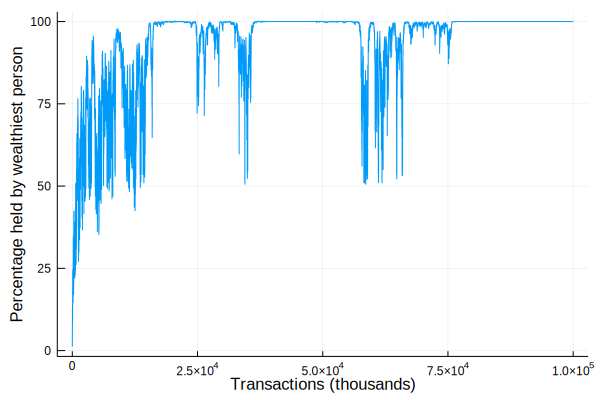

In [186]:
plot(m[1:1000:end], 
        xlabel="Transactions (thousands)", 
        ylabel="Percentage held by wealthiest person", 
        label=[""]
    )